# Online Shoppers Intention: Modelling
Goal: Build a Machine Learning Model
- Supervised Learning:
    1. Logistic Regression
    2. SVM
    3. Random Forest
    
    
- Unsupervised Learning:
    1. K-Means Clustering

In [1]:
# import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree, svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
raw_data = pd.read_csv('online_shoppers_intention.csv')
raw_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
# Create new features

raw_data['total_page_view'] = raw_data['Administrative'] + raw_data['Informational'] + raw_data['ProductRelated']
raw_data['total_page_duration']=raw_data['Administrative_Duration']+raw_data['Informational_Duration']+raw_data['ProductRelated_Duration']
raw_data['product_view_percent'] = raw_data['ProductRelated']/raw_data['total_page_view']*100
raw_data['product_duration_percent'] = raw_data['ProductRelated_Duration']/raw_data['total_page_duration']*100
raw_data['avg_product_duration'] = raw_data['ProductRelated_Duration']/raw_data['ProductRelated']
raw_data = raw_data.fillna(0)

In [4]:
raw_data = raw_data.drop(columns = ['Administrative','Administrative_Duration','Informational','Informational_Duration',
                       'ProductRelated','ProductRelated_Duration'], axis = 1)

In [5]:
raw_data['Revenue'] = raw_data['Revenue'].astype(int)

In [6]:
new_cols = ['total_page_view', 'total_page_duration', 'product_view_percent',
       'product_duration_percent', 'avg_product_duration', 'BounceRates in %', 'ExitRates in %',
        'PageValues','SpecialDay (probability)', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
raw_data = raw_data.reindex(columns = new_cols)

In [7]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

# Transform categorical data into number
raw_data['Month'] = encode.fit_transform(raw_data['Month'].values)
raw_data['OperatingSystems'] = encode.fit_transform(raw_data['OperatingSystems'].values)
raw_data['Browser'] = encode.fit_transform(raw_data['Browser'].values)
raw_data['Region'] = encode.fit_transform(raw_data['Region'].values)
raw_data['TrafficType'] = encode.fit_transform(raw_data['TrafficType'].values)
raw_data['VisitorType'] = encode.fit_transform(raw_data['VisitorType'].values)
raw_data['Weekend'] = encode.fit_transform(raw_data['Weekend'].values)

In [8]:
# Since data is highly imbalanced, we need to perform oversampling using SMOTE
from imblearn.over_sampling import SMOTE

X = raw_data.drop('Revenue', axis = 1)
y = raw_data['Revenue'] 

sm = SMOTE(random_state = 9)
X_sampling, y_sampling = sm.fit_resample(X, y)

In [9]:
features = ['Month','OperatingSystems','Browser','Region','TrafficType', 'VisitorType','Weekend']
dummies = pd.get_dummies(X_sampling, columns=features)
dummies

,total_page_view,total_page_duration,product_view_percent,product_duration_percent,avg_product_duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month_0,...,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,VisitorType_0,VisitorType_1,VisitorType_2,Weekend_0,Weekend_1
0,1,0.000000,100.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.0,0,...,0,0,0,0,0,0,0,1,1,0
1,2,64.000000,100.000000,100.000000,32.000000,0.000000,0.100000,0.000000,0.0,0,...,0,0,0,0,0,0,0,1,1,0
2,1,0.000000,100.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.0,0,...,0,0,0,0,0,0,0,1,1,0
3,2,2.666667,100.000000,100.000000,1.333333,0.050000,0.140000,0.000000,0.0,0,...,0,0,0,0,0,0,0,1,1,0
4,10,627.500000,100.000000,100.000000,62.750000,0.020000,0.050000,0.000000,0.0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20839,12,583.356991,81.566818,82.661484,47.548759,0.013519,0.036061,25.545949,0.0,0,...,0,0,0,0,0,0,0,1,1,0
20840,33,785.139275,96.423917,95.089836,23.185602,0.000000,0.005040,62.232883,0.0,0,...,0,0,0,0,0,0,1,0,0,1
20841,206,8683.527675,91.889364,90.652560,42.841018,0.005212,0.021857,5.241587,0.0,0,...,0,0,0,0,0,0,0,1,1,0
20842,36,1395.816840,90.885304,91.875572,39.179937,0.002860,0.016092,1.301674,0.0,0,...,0,0,0,0,0,0,0,1,1,0


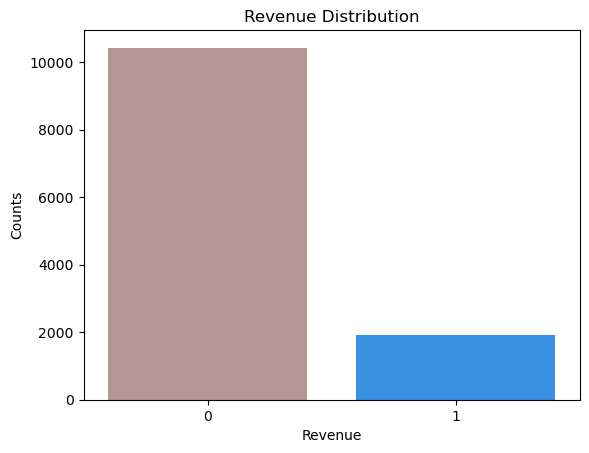

In [10]:
# Revenue Distribution before SMOTE

rev_color = {True : 'dodgerblue', False: 'rosybrown'}
sns.countplot(data = raw_data, x = 'Revenue', palette = rev_color)
plt.xlabel('Revenue')
plt.ylabel('Counts')
plt.title('Revenue Distribution')
plt.show()

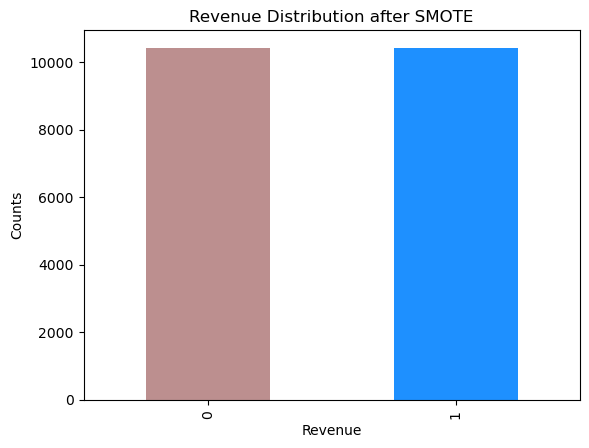

In [11]:
# after SMOTE()

y_sampling.value_counts().plot(kind='bar', color = ['rosybrown','dodgerblue'])
plt.xlabel('Revenue')
plt.ylabel('Counts')
plt.title('Revenue Distribution after SMOTE')
plt.show()

## K-Means Clustering

In [12]:
dummies.columns

Index(['total_page_view', 'total_page_duration', 'product_view_percent',
       'product_duration_percent', 'avg_product_duration', 'BounceRates in %',
       'ExitRates in %', 'PageValues', 'SpecialDay (probability)', 'Month_0',
       'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'OperatingSystems_0',
       'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3',
       'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6',
       'OperatingSystems_7', 'Browser_0', 'Browser_1', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Region_0', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5',
       'Region_6', 'Region_7', 'Region_8', 'TrafficType_0', 'TrafficType_1',
       'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5',
       'TrafficType_6', 'TrafficType_7', 'T

In [13]:
# Run the KMeans

kmeans_x = dummies.values

# Start with 5 clusters
kmeans = KMeans(n_clusters = 5, random_state = 40)
kmeans = kmeans.fit(kmeans_x)

# Inertia - show how cohert the clusters are (we want the value to be as low as possible)
print('The inertia is:', kmeans.inertia_)

The inertia is: 11355087858.232012


In [14]:
# Find the best number of clusters

no_of_cluster = range(2,20)
inertia=[]

for f in no_of_cluster:
    kmeans = KMeans(n_clusters=f, random_state = 2)
    kmeans = kmeans.fit(kmeans_x)
    u = kmeans.inertia_
    inertia.append(u)
    print('The inertia for {} is {}'.format(f, u))

The inertia for 2 is 43082221437.08279
The inertia for 3 is 24411098308.805737
The inertia for 4 is 16500741642.634743
The inertia for 5 is 11355129247.117323
The inertia for 6 is 8358052353.3223
The inertia for 7 is 6317279261.174873
The inertia for 8 is 4541796607.520235
The inertia for 9 is 3488374273.5384626
The inertia for 10 is 2857714456.195619
The inertia for 11 is 2349334364.002446
The inertia for 12 is 2103136583.237271
The inertia for 13 is 1685420433.4995763
The inertia for 14 is 1400452584.76721
The inertia for 15 is 1222761651.7806573
The inertia for 16 is 1075063509.8682547
The inertia for 17 is 956653168.4961436
The inertia for 18 is 852044186.4358706
The inertia for 19 is 784103294.9937326


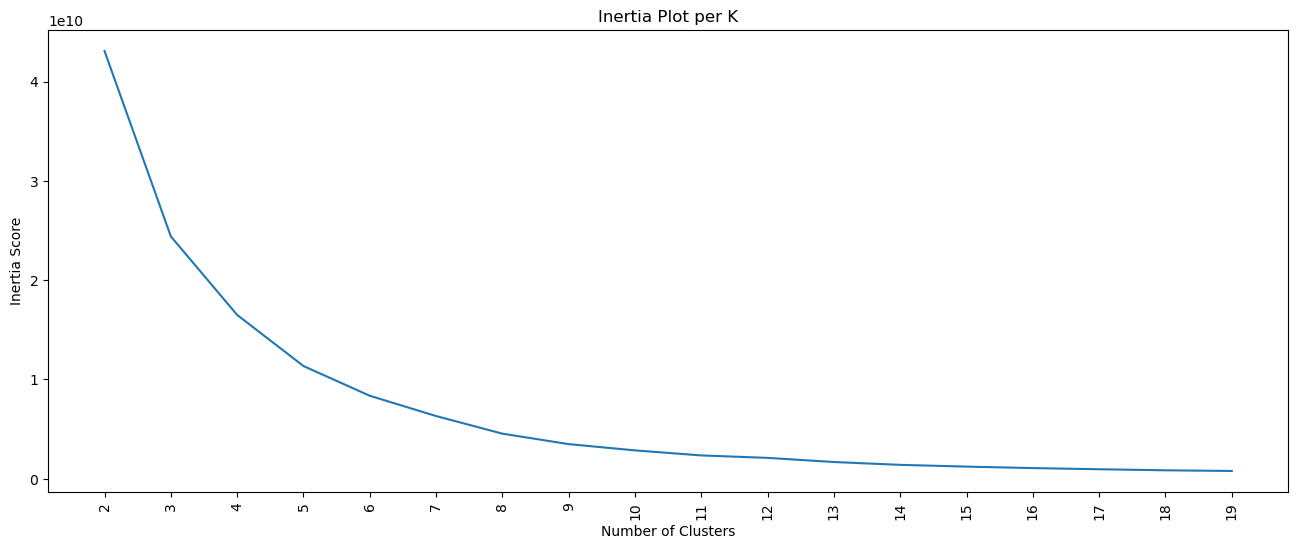

In [15]:
# Use elbow method to see inertia for each k values

fig, (ax1) = plt.subplots(1, figsize = (16,6))
xx = np.arange(len(no_of_cluster))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_cluster, rotation = 'vertical')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.title('Inertia Plot per K')
plt.show()

In [16]:
# based on the elbow method, the optimum number of clusters is 5 clusters.
kmeans = KMeans(n_clusters = 4, random_state = 7)
kmeans = kmeans.fit(kmeans_x)

# kmeans.labels_

predictions = kmeans.predict(kmeans_x)

# calculate the count of clusters
unique, counts = np.unique(predictions, return_counts = True)
counts = counts.reshape(1,4)

# Creating a dataframe
counts_clf = pd.DataFrame(counts, columns=['CLuster 0','Cluster 1','CLuster 2','Cluster 3'])
counts_clf

,CLuster 0,Cluster 1,CLuster 2,Cluster 3
0,14442,1364,4742,296


Explained variance ratio: [9.99339099e-01 3.05782027e-04]


<Figure size 640x480 with 0 Axes>

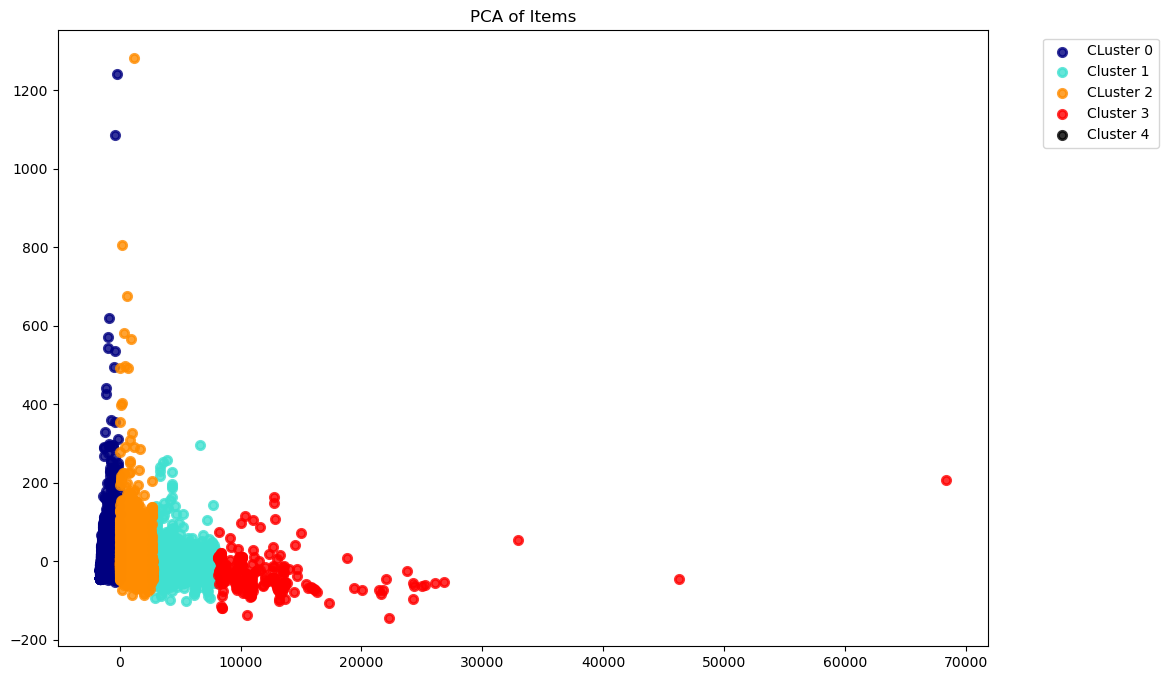

In [17]:
# Run PCA to visualize the data

x_pca = kmeans_x
y_pca = predictions

target_cols=['CLuster 0','Cluster 1','CLuster 2','Cluster 3','Cluster 4']
pca = PCA(n_components = 2, random_state = 453)
x_r = pca.fit(x_pca).transform(x_pca)

# Percantage of variance explained by each component
print('Explained variance ratio: %s' % str(pca.explained_variance_ratio_))

# plot the data
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy','turquoise','darkorange','red','black' ]
lw=2

for colors, i, target_cols in zip(colors,[0,1,2,3,4], target_cols):
    plt.scatter(x_r[y_pca==i,0], x_r[y_pca==i,1], color = colors, alpha=0.8, lw=lw, label = target_cols)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad = 0.6)
plt.title('PCA of Items')
plt.show()

- The first 2 pricipal component explained about 0.99% of variance in dataset

In [18]:
# pca.explained_variance_

In [19]:
# # Trying Dimensionality Reduction Prior to KMeans Clustering

# n_components = x_pca.shape[1]

# pca = PCA(n_components = n_components, random_state = 8)
# x_r = pca.fit(x_pca).transform(x_pca)

# # Calculating the 95% variance
# total_variance  = sum(pca.explained_variance_)
# print('Total Variance in ourdataset is', total_variance)

# var_95 = total_variance * 0.95
# print('The 95% variance we want to is', var_95)

# # creating a df with the components and explained variance
# a = zip(range(0, n_components), pca.explained_variance_)
# a = pd.DataFrame(a, columns=['PCA comp','Explained Variance'])

# # Trying to hit 95%
# print('Variance explained with 1 components: ', sum(a['Explained Variance'][0:1]))
# print('Variance explained with 30 components: ', sum(a['Explained Variance'][0:30]))
# print('Variance explained with 40 components: ', sum(a['Explained Variance'][0:40]))

# # Plotting the data
# plt.figure(figsize=(14,8))
# plt.plot(pca.explained_variance_ratio_, linewidth = 2, c='r')
# plt.xlabel('n_components')
# plt.ylabel('explained_ratio_')

# # Plot vertical line with 95% e.v
# plt.axvline()

## Logistic Regression

In [20]:
dummies

,total_page_view,total_page_duration,product_view_percent,product_duration_percent,avg_product_duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month_0,...,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,VisitorType_0,VisitorType_1,VisitorType_2,Weekend_0,Weekend_1
0,1,0.000000,100.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.0,0,...,0,0,0,0,0,0,0,1,1,0
1,2,64.000000,100.000000,100.000000,32.000000,0.000000,0.100000,0.000000,0.0,0,...,0,0,0,0,0,0,0,1,1,0
2,1,0.000000,100.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.0,0,...,0,0,0,0,0,0,0,1,1,0
3,2,2.666667,100.000000,100.000000,1.333333,0.050000,0.140000,0.000000,0.0,0,...,0,0,0,0,0,0,0,1,1,0
4,10,627.500000,100.000000,100.000000,62.750000,0.020000,0.050000,0.000000,0.0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20839,12,583.356991,81.566818,82.661484,47.548759,0.013519,0.036061,25.545949,0.0,0,...,0,0,0,0,0,0,0,1,1,0
20840,33,785.139275,96.423917,95.089836,23.185602,0.000000,0.005040,62.232883,0.0,0,...,0,0,0,0,0,0,1,0,0,1
20841,206,8683.527675,91.889364,90.652560,42.841018,0.005212,0.021857,5.241587,0.0,0,...,0,0,0,0,0,0,0,1,1,0
20842,36,1395.816840,90.885304,91.875572,39.179937,0.002860,0.016092,1.301674,0.0,0,...,0,0,0,0,0,0,0,1,1,0


In [21]:
# Perform Feature Importance with DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 15, criterion='entropy', max_depth=10)
dt.fit(dummies,y_sampling)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [22]:
fi_col = []
fi=[]

for i, column in enumerate(dummies):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    fi_col.append(column)
    fi.append(column)

The feature importance for total_page_view is : 0.019401154509465633
The feature importance for total_page_duration is : 0.02987549300338515
The feature importance for product_view_percent is : 0.04372487847887539
The feature importance for product_duration_percent is : 0.009443573053943853
The feature importance for avg_product_duration is : 0.013297234594112622
The feature importance for BounceRates in % is : 0.017570939459875378
The feature importance for ExitRates in % is : 0.018771309710010668
The feature importance for PageValues is : 0.701538948270785
The feature importance for SpecialDay (probability) is : 0.0
The feature importance for Month_0 is : 0.0008475324817921635
The feature importance for Month_1 is : 0.006934747836944343
The feature importance for Month_2 is : 0.00036800781317251506
The feature importance for Month_3 is : 0.003552837934641437
The feature importance for Month_4 is : 0.00018195618121795543
The feature importance for Month_5 is : 0.0016042291664931684
Th

In [23]:
# transform feature importance result into new dataframe

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns =['Feature','Feature Importance'])
fi_df.sort_values('Feature Importance', ascending=False).reset_index()
fi_df

,Feature,Feature Importance
0,total_page_view,total_page_view
1,total_page_duration,total_page_duration
2,product_view_percent,product_view_percent
3,product_duration_percent,product_duration_percent
4,avg_product_duration,avg_product_duration
...,...,...
69,VisitorType_0,VisitorType_0
70,VisitorType_1,VisitorType_1
71,VisitorType_2,VisitorType_2
72,Weekend_0,Weekend_0


In [24]:
# columns to keep
columns_to_keep = fi_df['Feature'][0:60]
columns_to_keep

0              total_page_view
1          total_page_duration
2         product_view_percent
3     product_duration_percent
4         avg_product_duration
5             BounceRates in %
6               ExitRates in %
7                   PageValues
8     SpecialDay (probability)
9                      Month_0
10                     Month_1
11                     Month_2
12                     Month_3
13                     Month_4
14                     Month_5
15                     Month_6
16                     Month_7
17                     Month_8
18                     Month_9
19          OperatingSystems_0
20          OperatingSystems_1
21          OperatingSystems_2
22          OperatingSystems_3
23          OperatingSystems_4
24          OperatingSystems_5
25          OperatingSystems_6
26          OperatingSystems_7
27                   Browser_0
28                   Browser_1
29                   Browser_2
30                   Browser_3
31                   Browser_4
32      

In [25]:
X = dummies[columns_to_keep].values
X

y = y_sampling
y

0        0
1        0
2        0
3        0
4        0
        ..
20839    1
20840    1
20841    1
20842    1
20843    1
Name: Revenue, Length: 20844, dtype: int64

- Split dataset into 3 subsets: train data, test data, and validation data with the ratio of __(70:15:15)__

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 101, stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                      test_size = X_test.shape[0]/X_train.shape[0], 
                                                      stratify = y_train)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(12506, 60)
(4169, 60)
(4169, 60)
(12506,)
(4169,)
(4169,)


In [27]:
# Run Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 5, solver='lbfgs')
log_reg.fit(X_train, y_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

In [28]:
y_pred = log_reg.predict(X_train)

In [29]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, log_loss

# Accuracy on Train
print('The training accuracy is', log_reg.score(X_train, y_train))

# Accuracy on Test
print('The testing accuracy is', log_reg.score(X_test, y_test))

# Classification Report
print(classification_report(y_train, y_pred))

The training accuracy is 0.8357588357588358
The testing accuracy is 0.8388102662508995
              precision    recall  f1-score   support

           0       0.80      0.89      0.84      6253
           1       0.88      0.78      0.83      6253

    accuracy                           0.84     12506
   macro avg       0.84      0.84      0.84     12506
weighted avg       0.84      0.84      0.84     12506



In [30]:
# Confusion Matrix Function

def plot_confusion_matrix(cm, classes=None, title='Confusion Matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels = classes, yticklabels = classes,
                   vmax=1., annot=True, annot_kws={'size':25})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.0)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [31]:
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
cm_norm

array([[0.89253158, 0.10746842],
       [0.22101391, 0.77898609]])

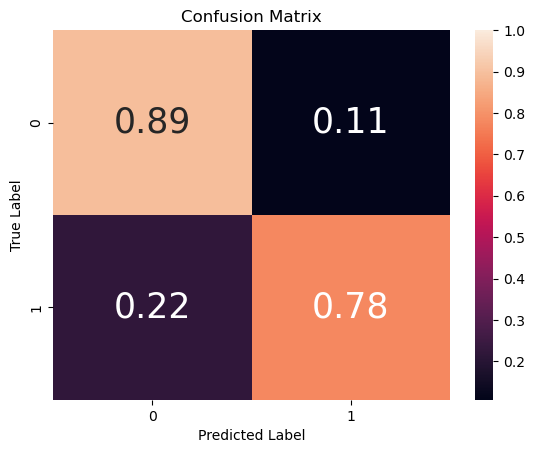

In [32]:
plot_confusion_matrix(cm_norm, classes = log_reg.classes_)

In [33]:
# Calculate False Positive(FP), False Negative (FN), True Positive (TP), True Negative (TN)

fp = cm.sum(axis = 0)-np.diag(cm)
fn = cm.sum(axis = 1)-np.diag(cm)
tp = np.diag(cm)
tn = cm.sum()-(fp+fn+tp)

# Total Positive Rate (TPR) or sensitivity or hit rate or recall
tpr = tp/(tp+fn)
print('True Positive Rate is', tpr)

# Positive Predictive Value (PPV) or Precision
ppv = tp/(tp+fp)
print('Positive Predictive Value is ', ppv)

# False positive rate or False alarm rate
fpr = fp/(fp+tn)
print('False positive rate is', fpr)

# False negative rate or miss rate
fnr = fn/(fn+tp)
print('False negative rate is', fnr)

# Total averages
print(' ')
print('The average TPR is ', tpr.sum()/2)
print('The average PPV is ', ppv.sum()/2)
print('The average FPR is ', fpr.sum()/2)
print('The average FNR is ', fnr.sum()/2)

# The commonly used metrics are TPR and PPV

True Positive Rate is [0.89253158 0.77898609]
Positive Predictive Value is  [0.80152233 0.87876601]
False positive rate is [0.22101391 0.10746842]
False negative rate is [0.10746842 0.22101391]
 
The average TPR is  0.8357588357588358
The average PPV is  0.8401441717566491
The average FPR is  0.16424116424116425
The average FNR is  0.16424116424116425


In [34]:
# Running log loss on training data
print('The log loss in training is: ', log_loss(y_train, pred_proba) )

# Runinng log loss on test data
pred_proba_t = log_reg.predict_proba(X_test)
print('The log loss in testing is:', log_loss(y_test, pred_proba_t))

The log loss in training is:  0.4154519673843216
The log loss in testing is: 0.42032096215238474


#### Perform Hyperparameter Tuning

- we will loop over parameter c (inverse of regularization strength)

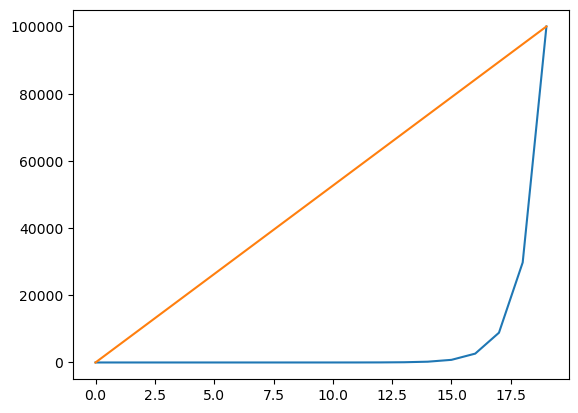

In [35]:
# Create a range for c values
np.geomspace(1e-5, 1e5, num=20)

# Plot 
plt.plot(np.geomspace(1e-5, 1e5, num=20))
plt.plot(np.linspace(1e-5, 1e5, num=20))

In [36]:
# Loop over the parameter

c_list = np.geomspace(1e-5, 1e5, num = 20)
ca = []
logarithmic_loss = []

for c in c_list:
    log_reg2 = LogisticRegression(random_state = 5, solver='lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    ca.append(score)
    print('The CA parameter {} is {}'.format(c, score))
    
    pred_proba_t = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_t)
    logarithmic_loss.append(log_loss2)
    print('The log loss of C Paramater {} is {}'.format(c, log_loss2))
    print('')

The CA parameter 1e-05 is 0.8213000719597026
The log loss of C Paramater 1e-05 is 0.45383900456026965

The CA parameter 3.359818286283781e-05 is 0.8222595346605901
The log loss of C Paramater 3.359818286283781e-05 is 0.4420890862282679

The CA parameter 0.00011288378916846884 is 0.8287359078915807
The log loss of C Paramater 0.00011288378916846884 is 0.44090358438073557

The CA parameter 0.000379269019073225 is 0.830175101942912
The log loss of C Paramater 0.000379269019073225 is 0.4344108040377985

The CA parameter 0.0012742749857031334 is 0.8347325497721276
The log loss of C Paramater 0.0012742749857031334 is 0.4249291911830716

The CA parameter 0.004281332398719391 is 0.8392899976013433
The log loss of C Paramater 0.004281332398719391 is 0.4218157672339302

The CA parameter 0.01438449888287663 is 0.8450467738066683
The log loss of C Paramater 0.01438449888287663 is 0.4272977618981757

The CA parameter 0.04832930238571752 is 0.839769728951787
The log loss of C Paramater 0.04832930238

In [37]:
# put the classification accuracy into new dataframe
ca2 = np.array(ca).reshape(20,)
logarithmic_loss2 = np.array(logarithmic_loss).reshape(20,)

outcomes = zip(c_list, ca, logarithmic_loss2)

df_outcomes = pd.DataFrame(outcomes, columns=['c_list','ca','logarithmic_loss2'])
df_outcomes = df_outcomes.sort_values('logarithmic_loss2', ascending=False).reset_index()
df_outcomes

,index,c_list,ca,logarithmic_loss2
0,0,0.000010,0.821300,0.453839
1,1,0.000034,0.822260,0.442089
2,2,0.000113,0.828736,0.440904
3,3,0.000379,0.830175,0.434411
4,12,20.691381,0.838570,0.430180
5,6,0.014384,0.845047,0.427298
6,4,0.001274,0.834733,0.424929
7,5,0.004281,0.839290,0.421816
8,15,784.759970,0.840010,0.421605
9,11,6.158482,0.839050,0.421081


- As for the final model, c = 0.000010 will be used

In [38]:
# Train a dummy clasifier

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
score = dummy_clf.score(X_test, y_test)

pred_proba_t = dummy_clf.predict_proba(X_test)
log_loss2 = log_loss(y_test, pred_proba_t)

print('Testing Acc: ', score)
print('Log loss: ', log_loss2)

Testing Acc:  0.4998800671623891
Log loss:  17.27353053091599


- The accuracy for testing data is 0.84, close to the accuracy from the best c coefficient

#### Final Logistic Regression Model

In [39]:
log_reg3 = LogisticRegression(random_state = 5, solver='lbfgs', C=0.000010)
log_reg3.fit(X_train, y_train)
score = log_reg3.score(X_valid, y_valid)

pred_proba_v = log_reg3.predict_proba(X_valid)
log_loss3 = log_loss(y_valid, pred_proba_v)

print('Testing ACC:', score)
print('Log loss:', log_loss3)

Testing ACC: 0.8059486687455025
Log loss: 0.4602082006491522


In [40]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      6253
           1       0.88      0.78      0.83      6253

    accuracy                           0.84     12506
   macro avg       0.84      0.84      0.84     12506
weighted avg       0.84      0.84      0.84     12506



In [41]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix, log_loss

# Accuracy on Train
print('The training accuracy is', log_reg3.score(X_train, y_train))

# Accuracy on Test
print('The testing accuracy is', log_reg3.score(X_valid, y_valid))

y_pred = log_reg3.predict(X_train)

# Classification Report
print(classification_report(y_train, y_pred))

The training accuracy is 0.8153686230609307
The testing accuracy is 0.8059486687455025
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      6253
           1       0.88      0.73      0.80      6253

    accuracy                           0.82     12506
   macro avg       0.82      0.82      0.81     12506
weighted avg       0.82      0.82      0.81     12506



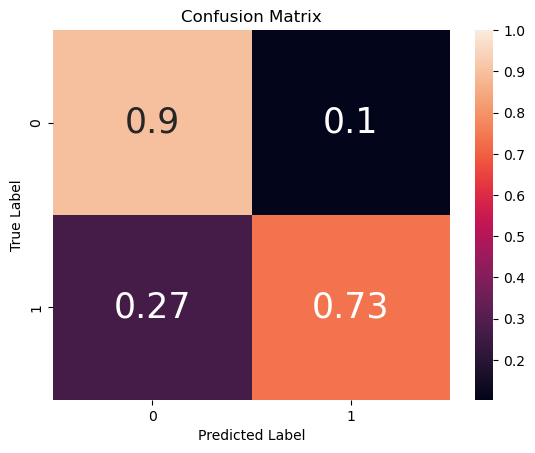

In [42]:
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1).reshape(-1,1)
cm_norm

plot_confusion_matrix(cm_norm, classes = log_reg.classes_)

## Decision Tree

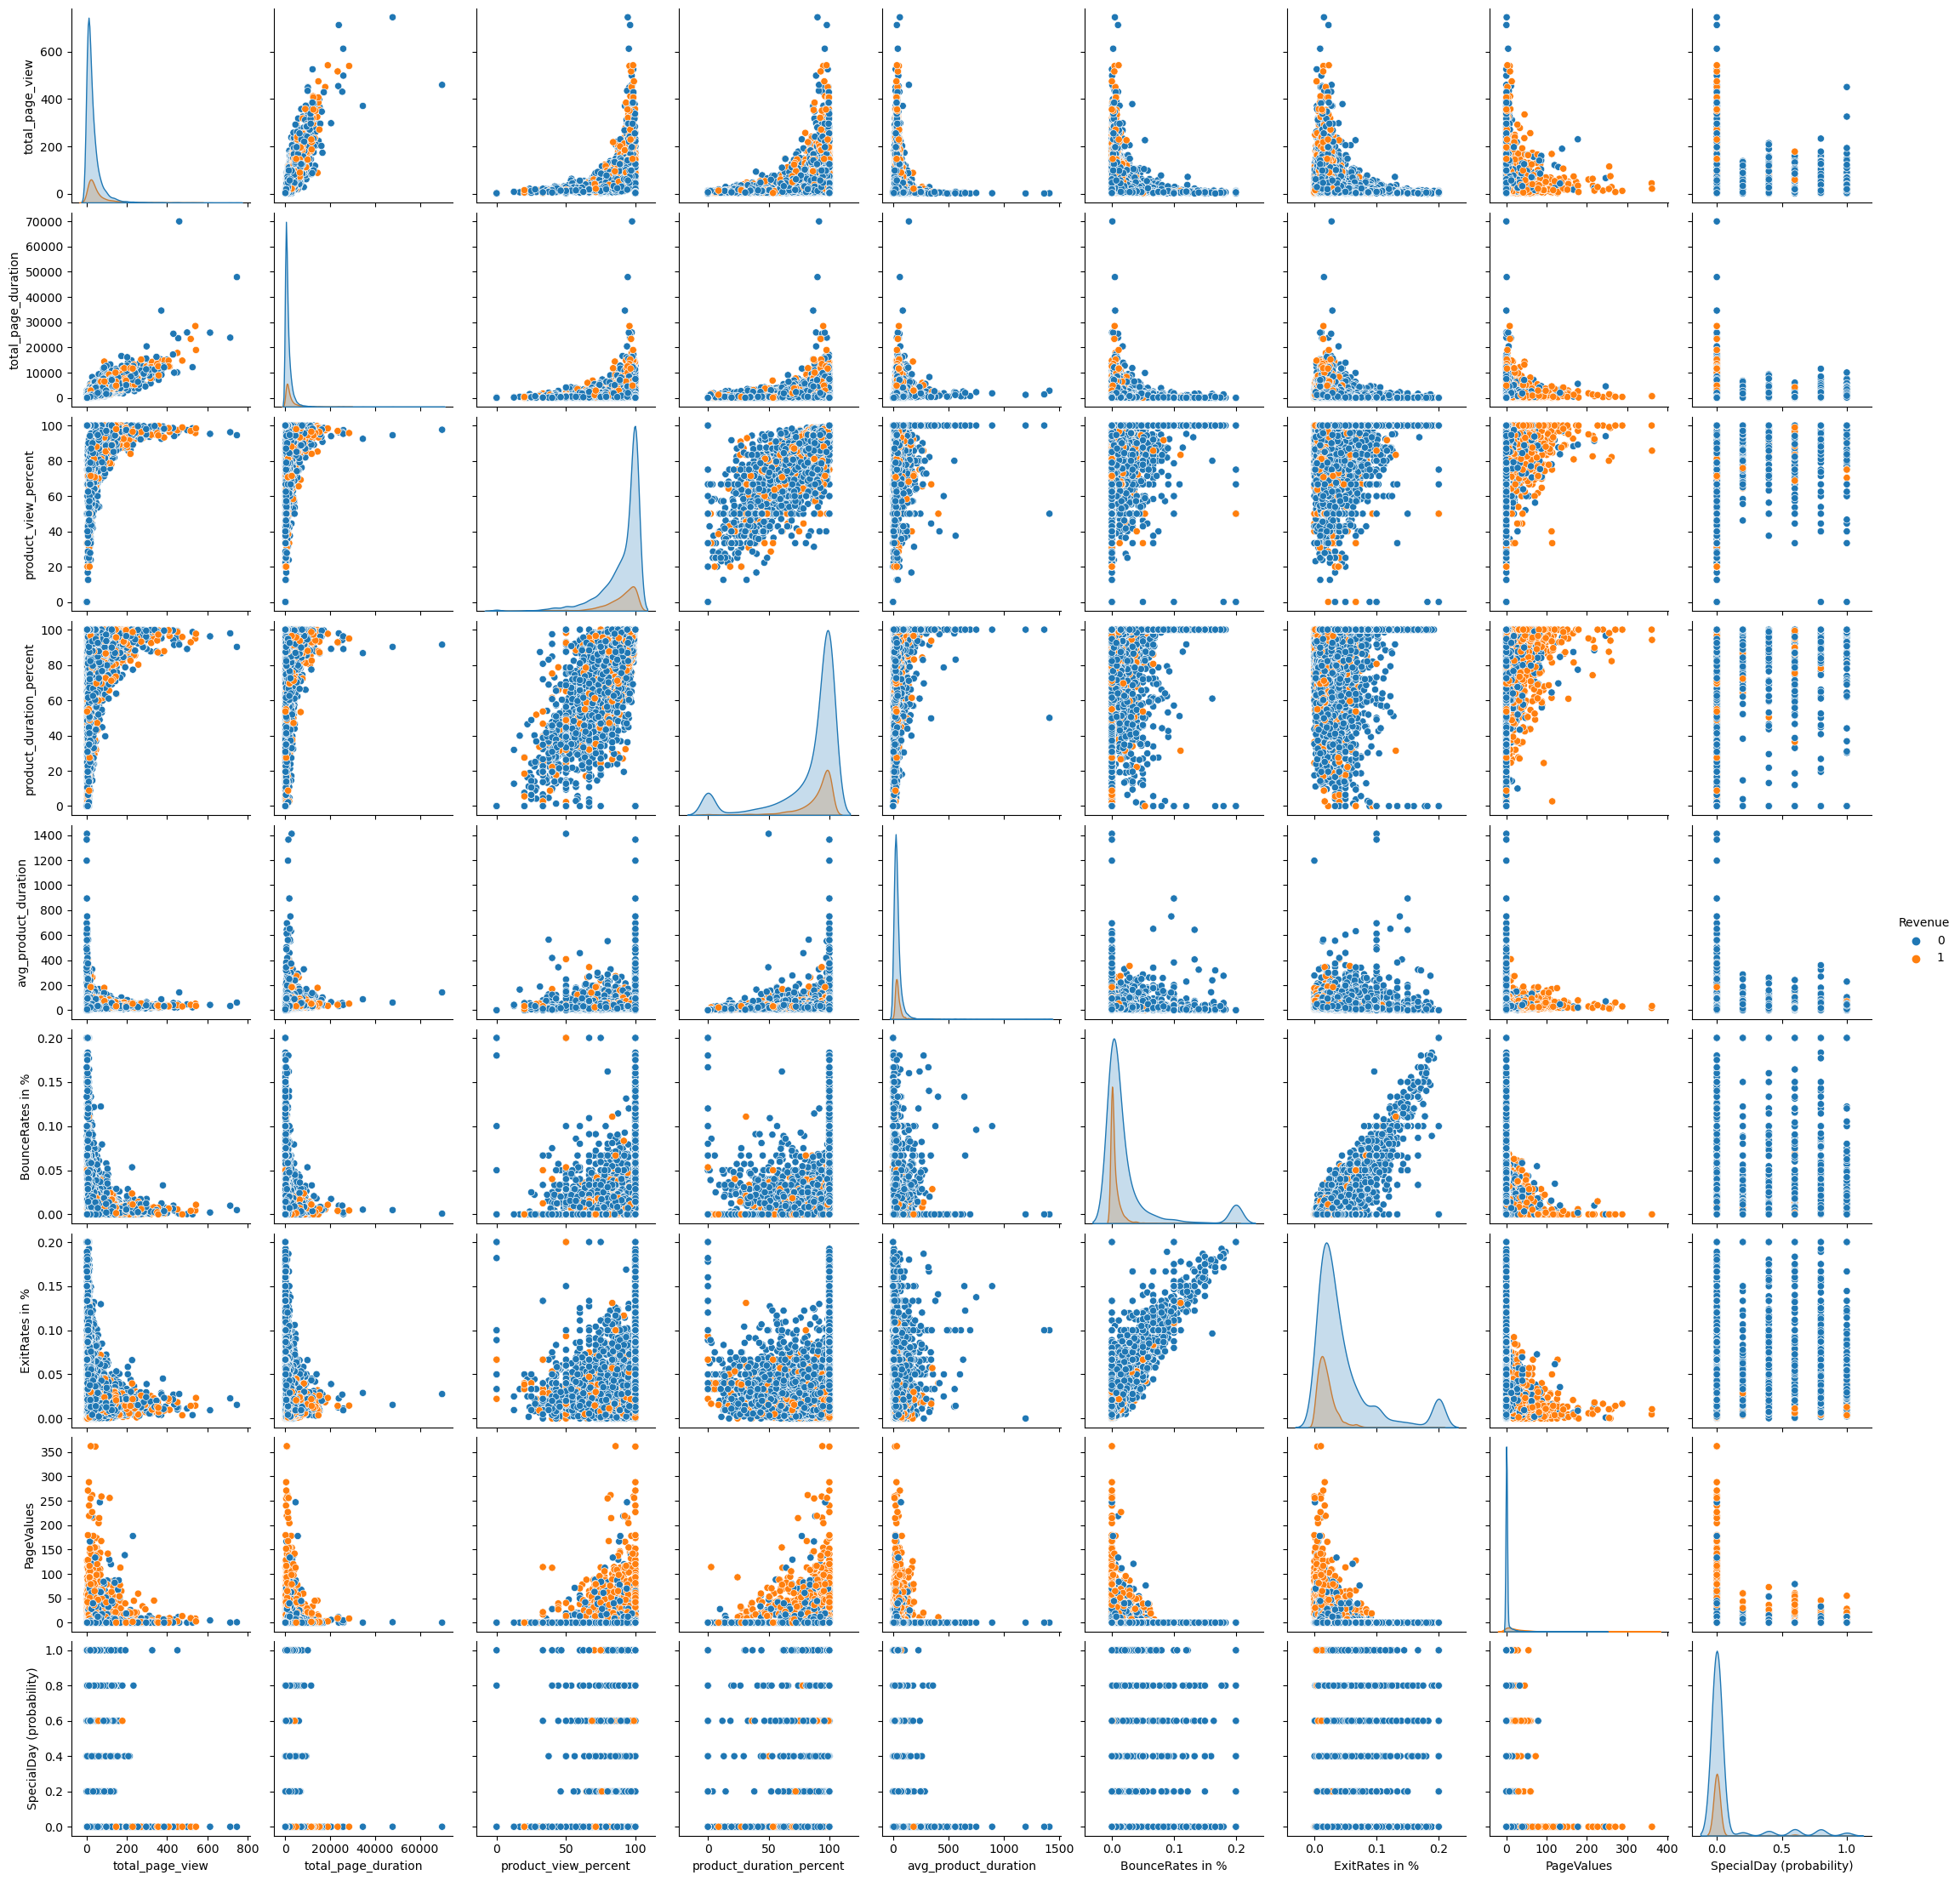

In [43]:
# numerical columns distribution
raw_data2 = raw_data[['total_page_view','total_page_duration','product_view_percent',
                     'product_duration_percent','avg_product_duration','BounceRates in %',
                    'ExitRates in %','PageValues','SpecialDay (probability)', 'Revenue']]
g = sns.pairplot(raw_data2, hue = 'Revenue', diag_kws={'bw':0.2})

In [44]:
raw_data

,total_page_view,total_page_duration,product_view_percent,product_duration_percent,avg_product_duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.000000,100.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.0,2,0,0,0,0,2,0,0
1,2,64.000000,100.000000,100.000000,32.000000,0.000000,0.100000,0.000000,0.0,2,1,1,0,1,2,0,0
2,1,0.000000,100.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.0,2,3,0,8,2,2,0,0
3,2,2.666667,100.000000,100.000000,1.333333,0.050000,0.140000,0.000000,0.0,2,2,1,1,3,2,0,0
4,10,627.500000,100.000000,100.000000,62.750000,0.020000,0.050000,0.000000,0.0,2,2,2,0,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,56,1928.791667,94.642857,92.482340,33.656447,0.007143,0.029031,12.241717,0.0,1,3,5,0,0,2,1,0
12326,5,465.750000,100.000000,100.000000,93.150000,0.000000,0.021333,0.000000,0.0,7,2,1,0,7,2,1,0
12327,6,184.250000,100.000000,100.000000,30.708333,0.083333,0.086667,0.000000,0.0,7,2,1,0,12,2,1,0
12328,19,421.000000,78.947368,82.185273,23.066667,0.000000,0.021053,0.000000,0.0,7,1,1,2,10,2,0,0


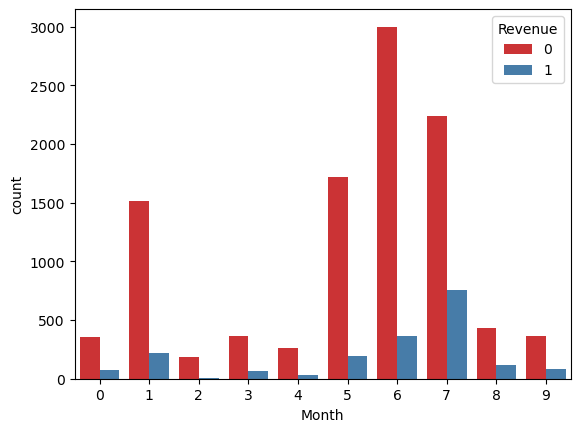

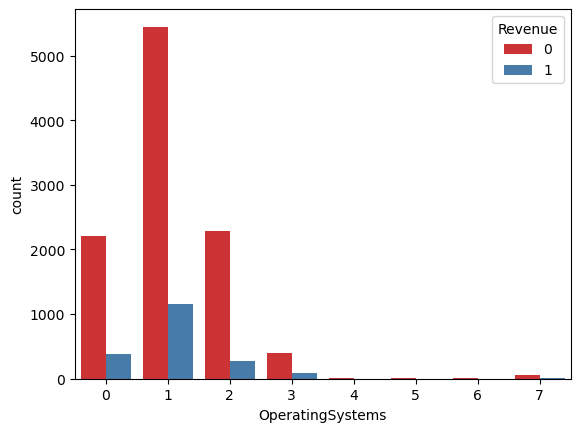

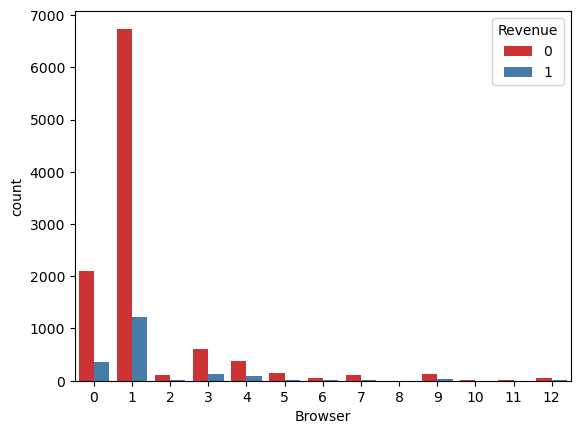

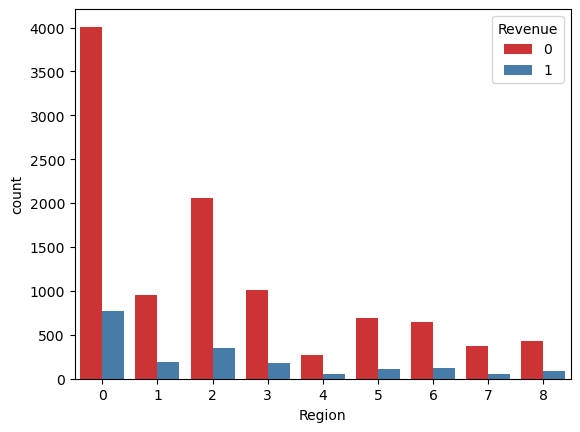

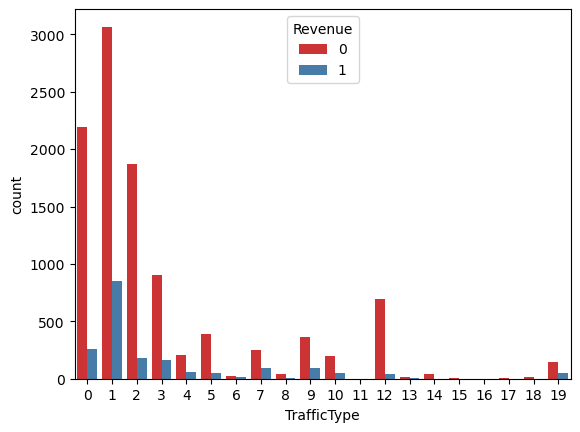

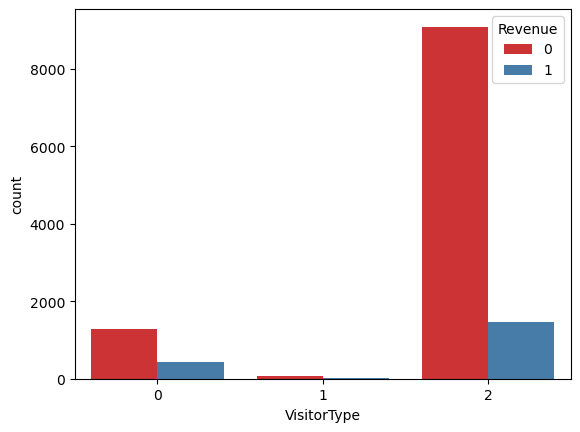

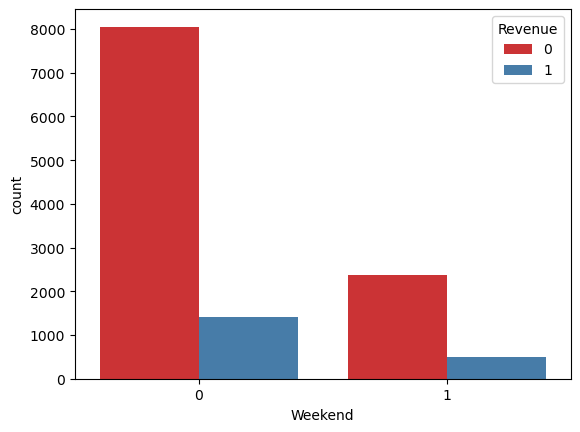

In [45]:
# Investigate categorical variable

cat_feature = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend']

for f in cat_feature:
    plt.figure()
    ax=sns.countplot(x = f, data = raw_data, hue='Revenue', palette='Set1')

In [46]:
# Perform scaling to improve model accuracy and make it run faster
scaled_X = dummies
scaled_cols = ['total_page_view','total_page_duration','product_view_percent','product_duration_percent',
             'avg_product_duration','BounceRates in %','ExitRates in %']
scaler = MinMaxScaler()
scaled_X[scaled_cols] = scaler.fit_transform(scaled_X[scaled_cols])
scaled_X.head()

,total_page_view,total_page_duration,product_view_percent,product_duration_percent,avg_product_duration,BounceRates in %,ExitRates in %,PageValues,SpecialDay (probability),Month_0,...,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,VisitorType_0,VisitorType_1,VisitorType_2,Weekend_0,Weekend_1
0,0.001340,0.000000,1.0,0.0,0.000000,1.00,1.00,0.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.002681,0.000915,1.0,1.0,0.022679,0.00,0.50,0.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.001340,0.000000,1.0,0.0,0.000000,1.00,1.00,0.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.002681,0.000038,1.0,1.0,0.000945,0.25,0.70,0.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0
4,0.013405,0.008974,1.0,1.0,0.044472,0.10,0.25,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1


In [47]:
# split the scaled data for hold-out validation

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, train_size = 0.8, random_state = 101, stratify = y)

In [48]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state = 1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

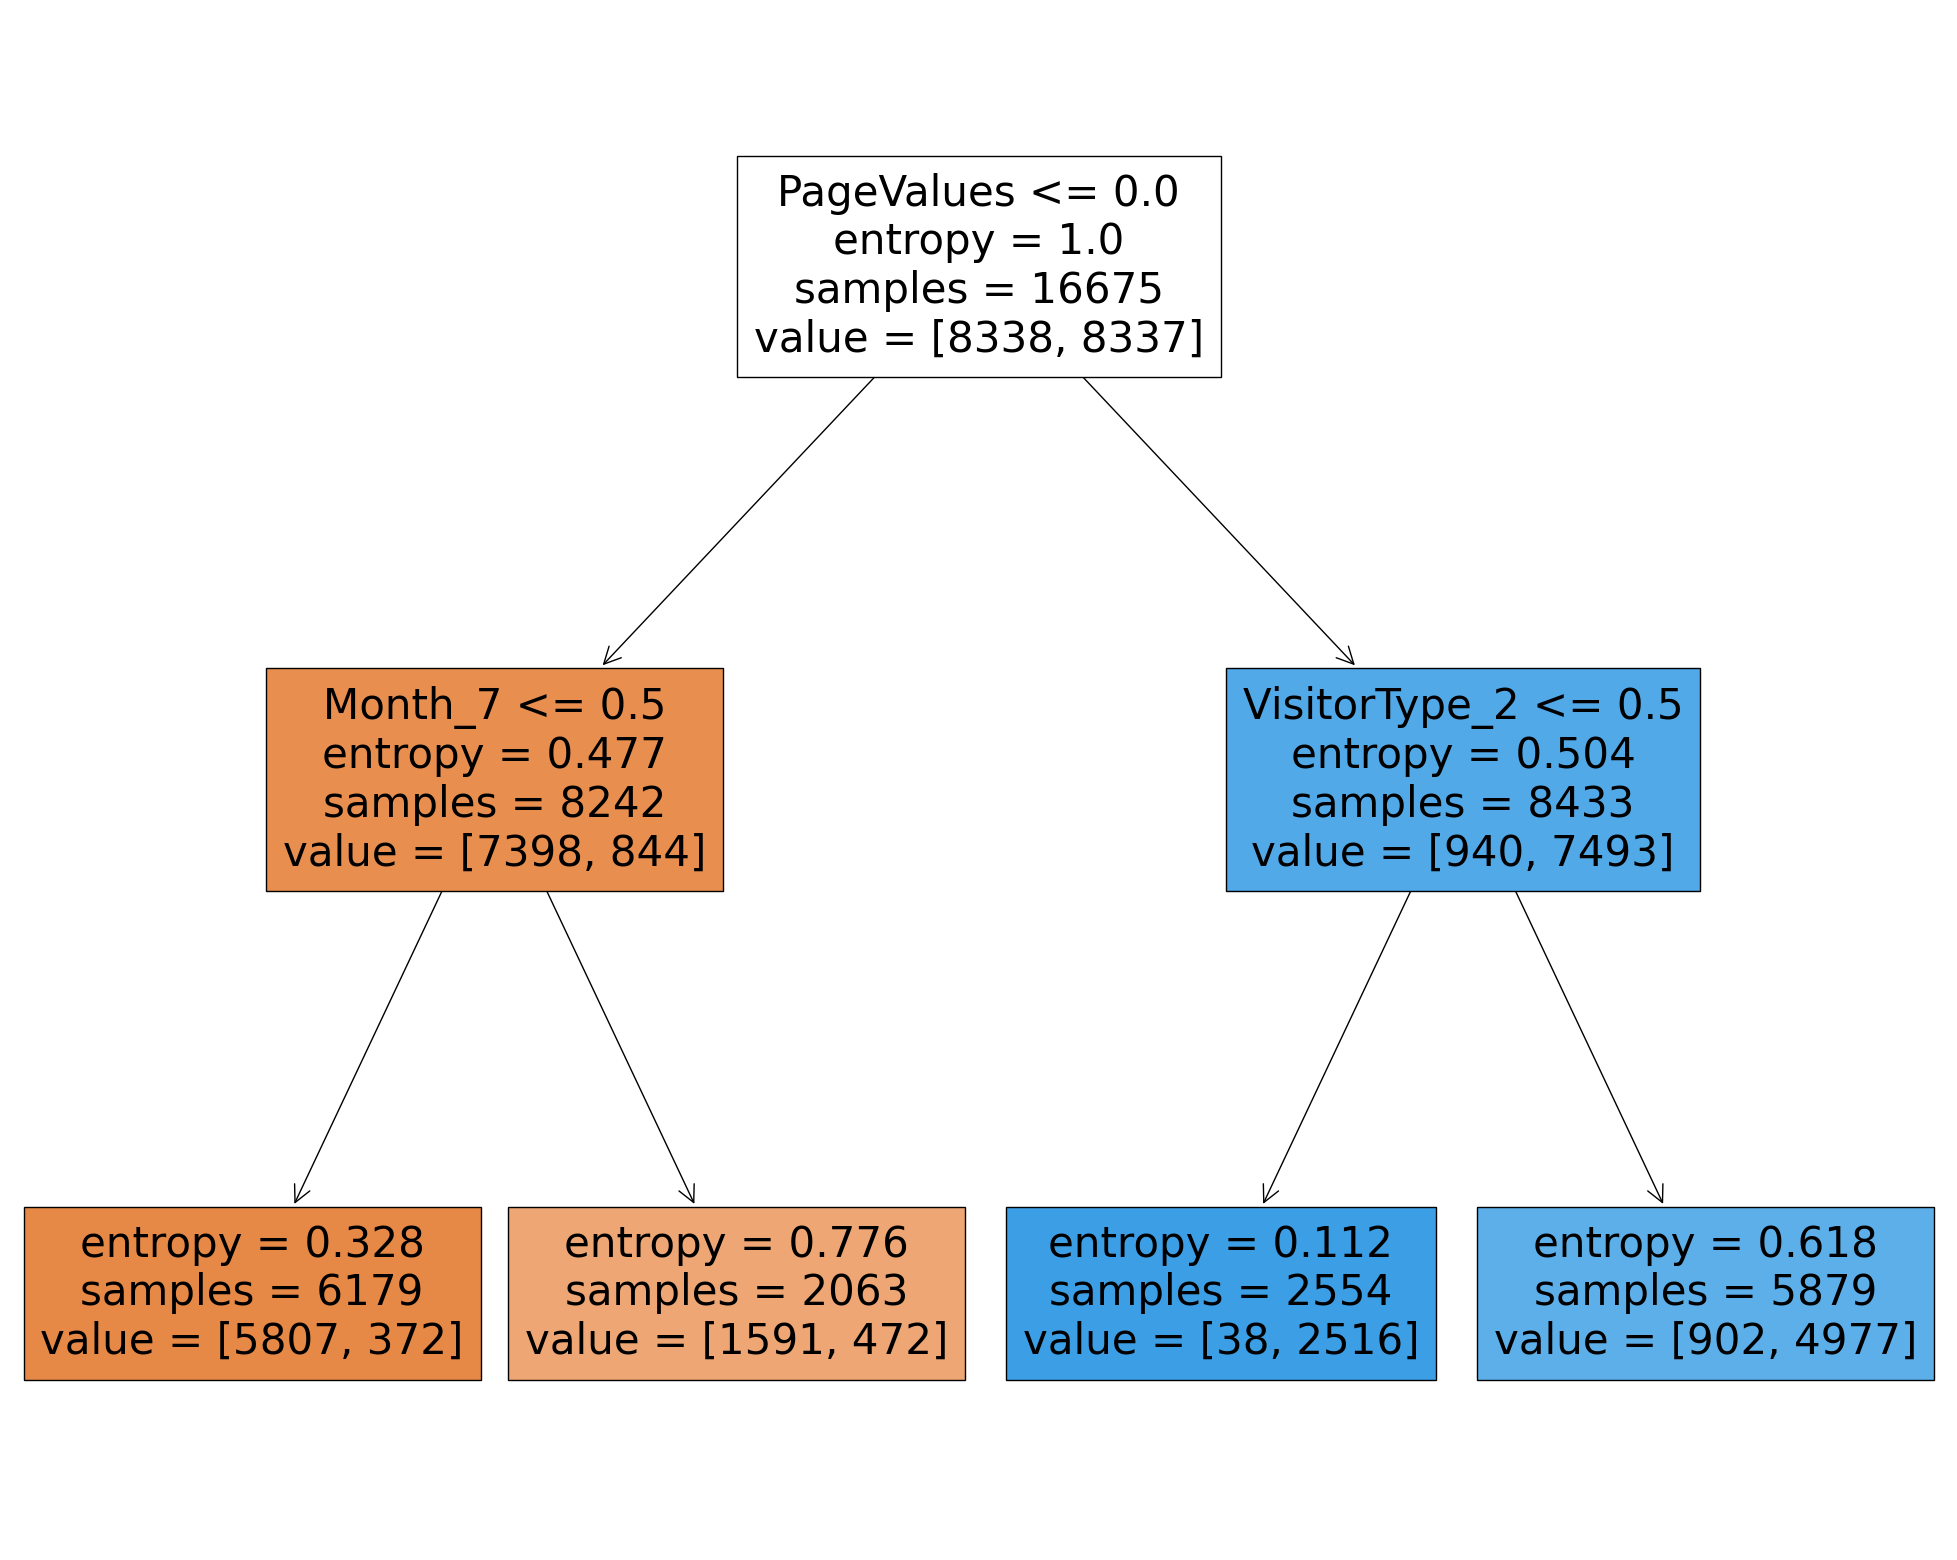

In [49]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(dt,feature_names=X_train.columns,
                   filled=True)

Training Accuracy is: 0.8930134932533733
Testing Accuracy is: 0.8858239385943871


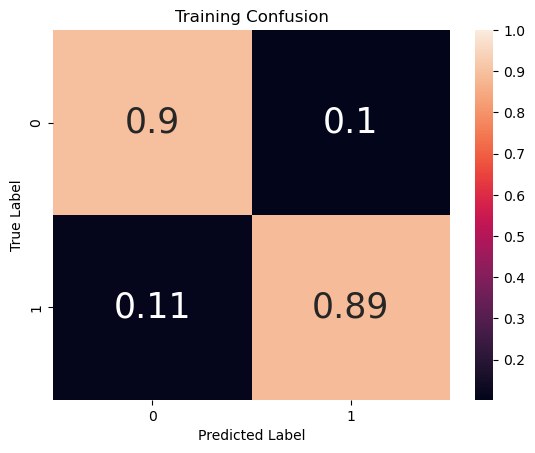

In [50]:
print('Training Accuracy is:', dt.score(X_train, y_train))

print('Testing Accuracy is:', dt.score(X_test,y_test))

# Plot confusion Matrix

y_pred = dt.predict(X_train)

cm = confusion_matrix(y_pred, y_train)
cm_norm = cm/cm.sum(axis = 1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes = dt.classes_, title='Training Confusion')

## Random Forest

The Training accuracy is : 1.0
The Test accuracy is : 0.9213240585272248


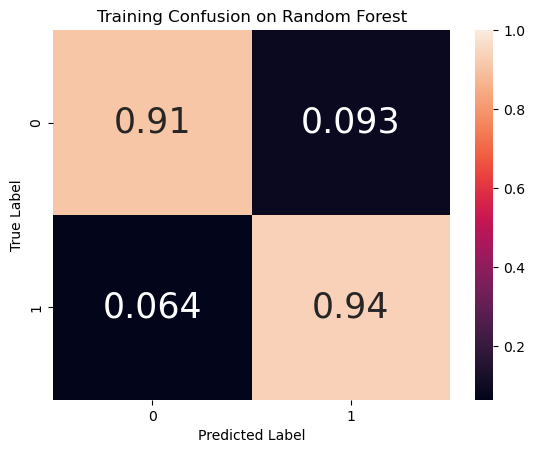

In [51]:
rf = RandomForestClassifier(n_estimators = 100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# Accuracy on Training
print('The Training accuracy is :', rf.score(X_train, y_train))
# Accuracy on Test
print('The Test accuracy is :', rf.score(X_test, y_test))


# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis = 1)[:, np.newaxis]

plt.figure()
plot_confusion_matrix(cm_norm, classes = rf.classes_, title='Training Confusion on Random Forest')

Classification Accuracy on test set with the maximum features = 1 and max_depth None: 0.909
Classification Accuracy on test set with the maximum features = 1 and max_depth 2: 0.863
Classification Accuracy on test set with the maximum features = 1 and max_depth 3: 0.834
Classification Accuracy on test set with the maximum features = 1 and max_depth 4: 0.806
Classification Accuracy on test set with the maximum features = 1 and max_depth 5: 0.799
Classification Accuracy on test set with the maximum features = sqrt and max_depth None: 0.920
Classification Accuracy on test set with the maximum features = sqrt and max_depth 2: 0.820
Classification Accuracy on test set with the maximum features = sqrt and max_depth 3: 0.856
Classification Accuracy on test set with the maximum features = sqrt and max_depth 4: 0.882
Classification Accuracy on test set with the maximum features = sqrt and max_depth 5: 0.893
Classification Accuracy on test set with the maximum features = log2 and max_depth None: 

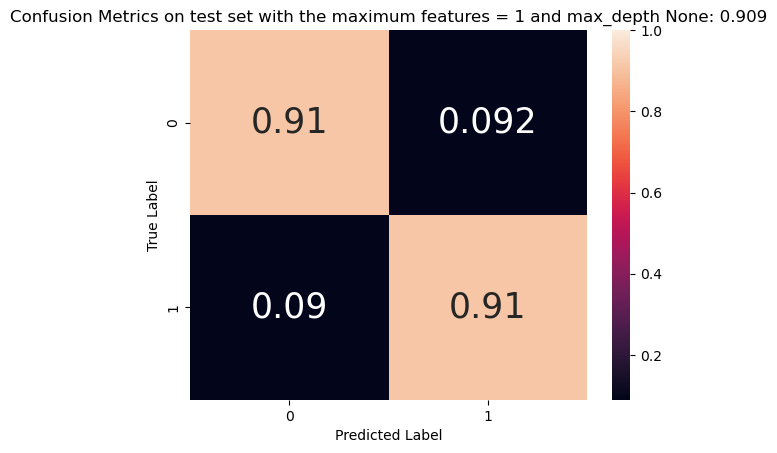

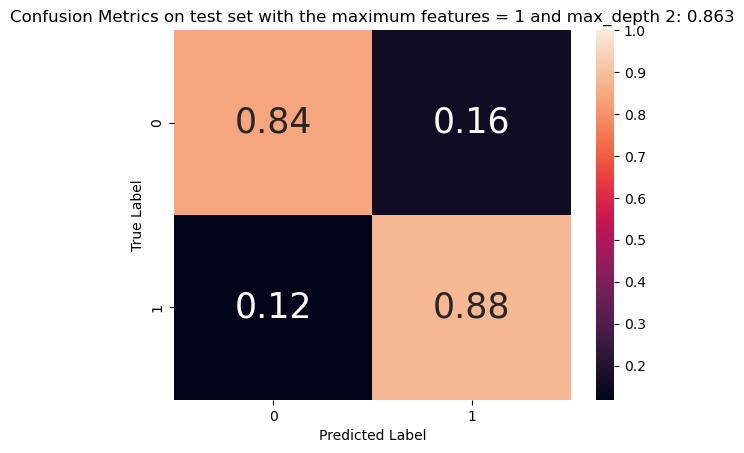

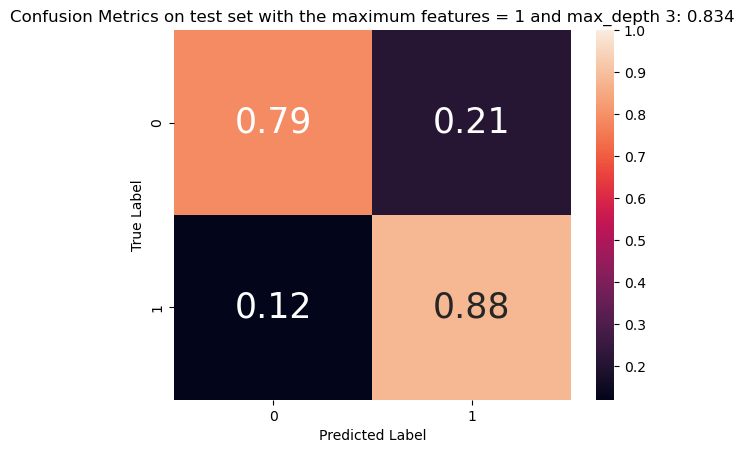

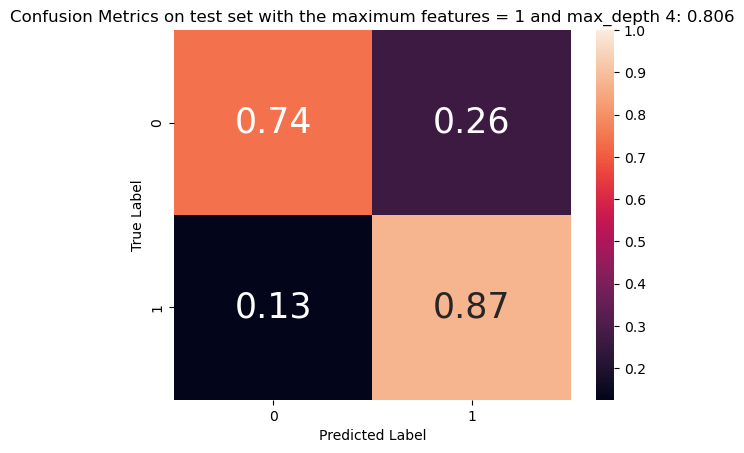

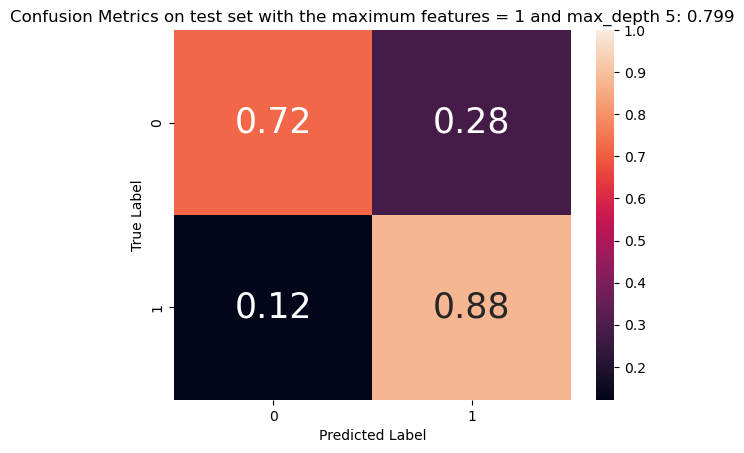

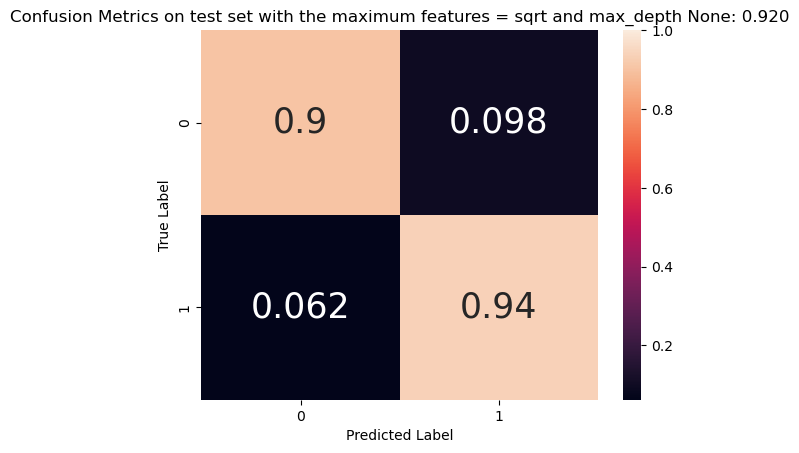

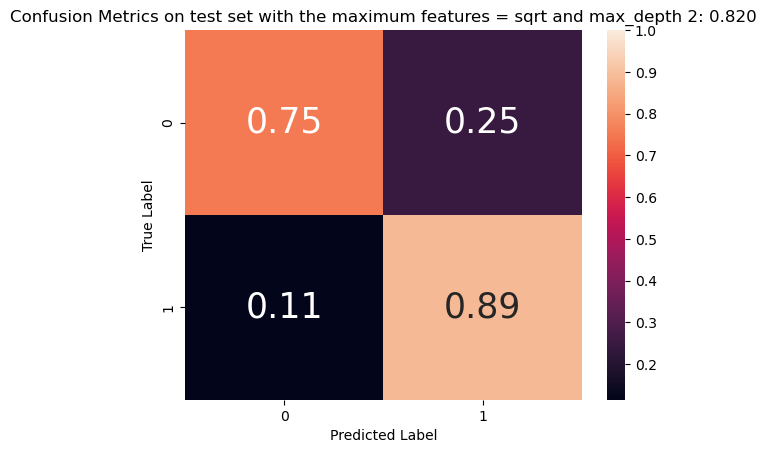

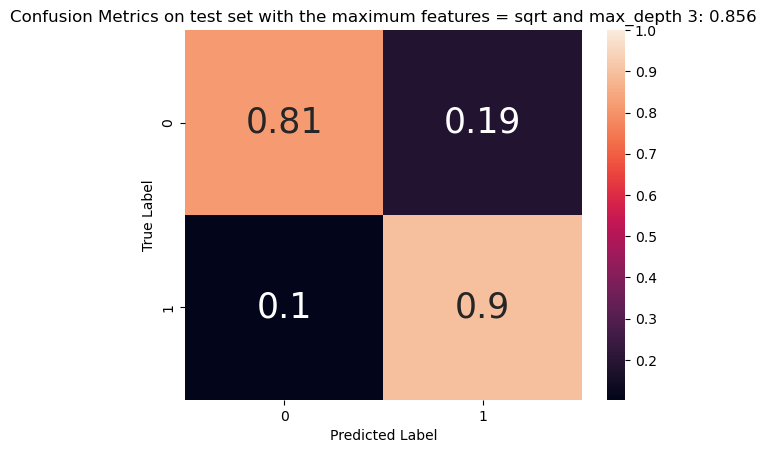

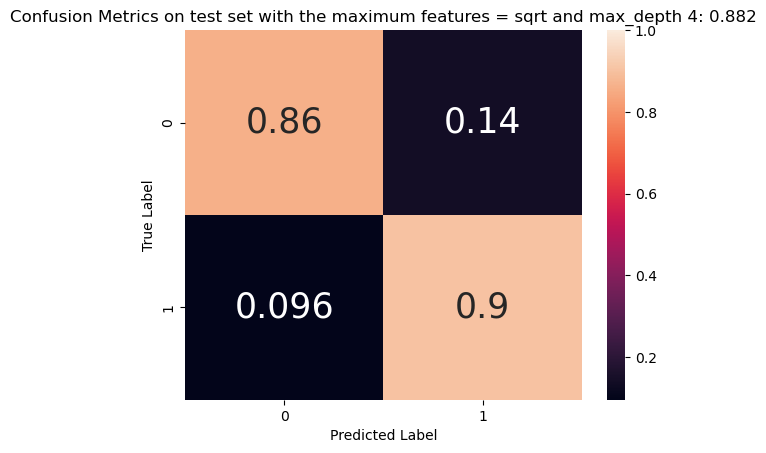

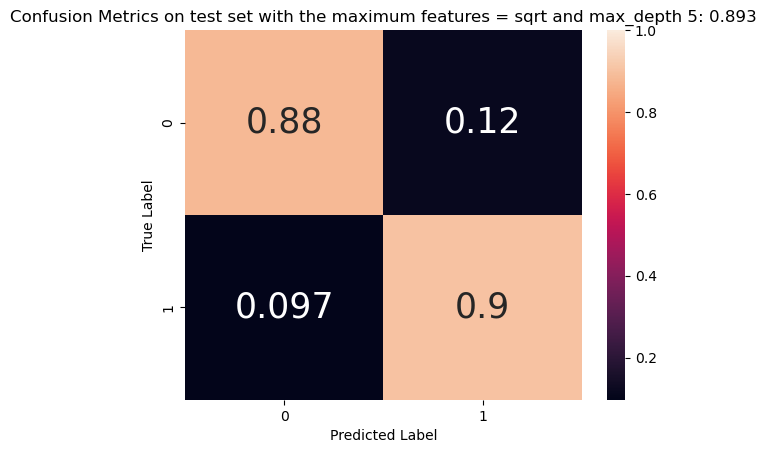

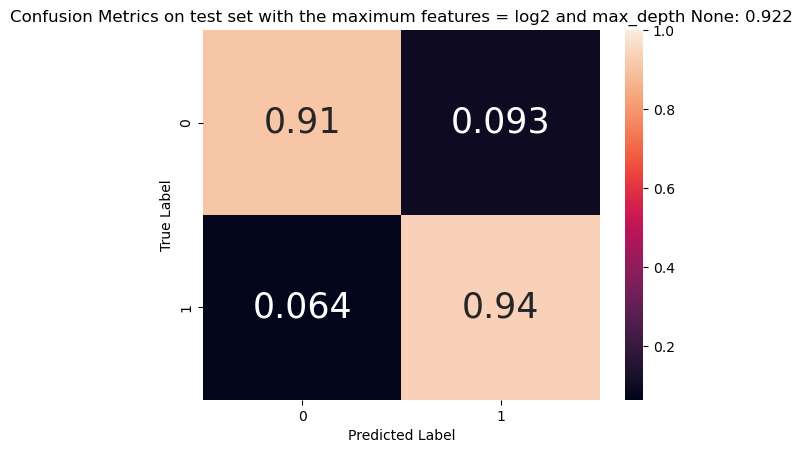

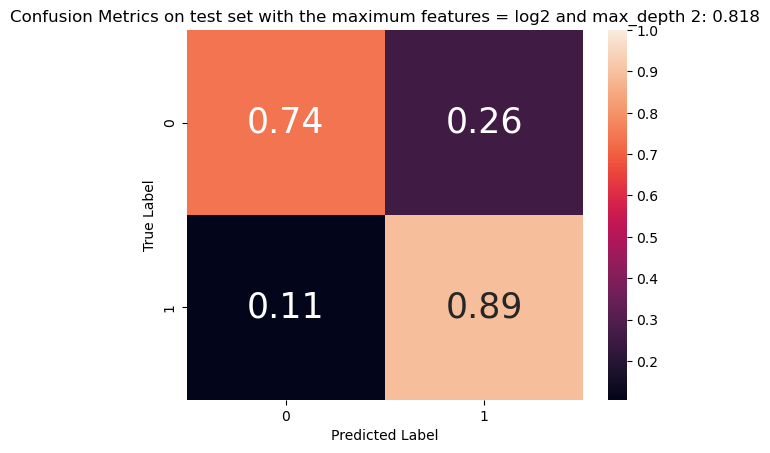

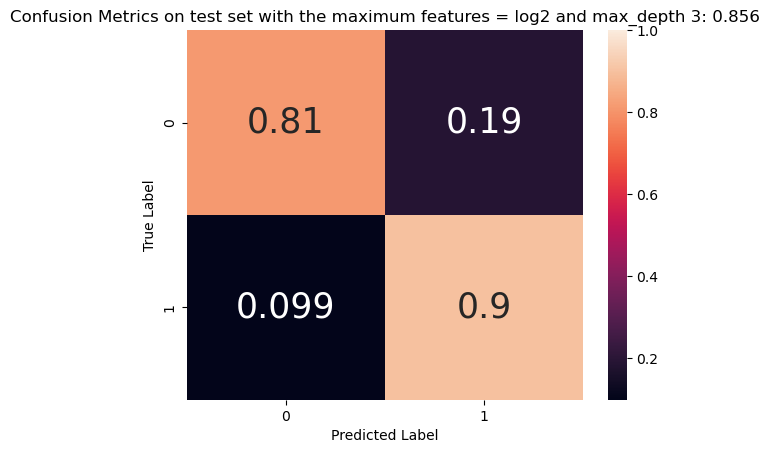

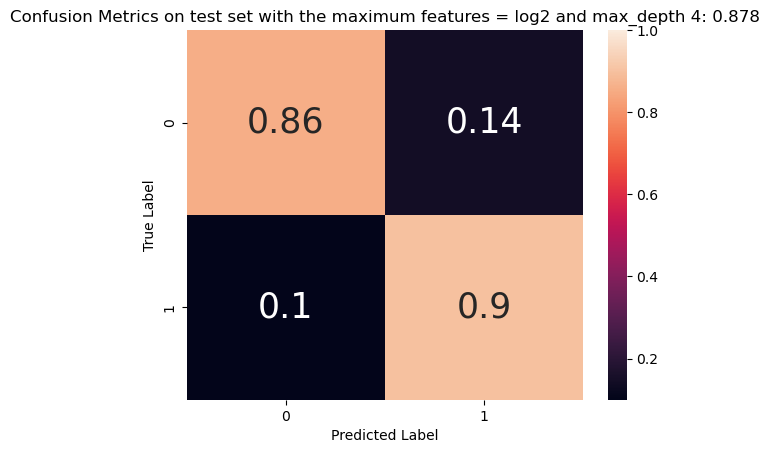

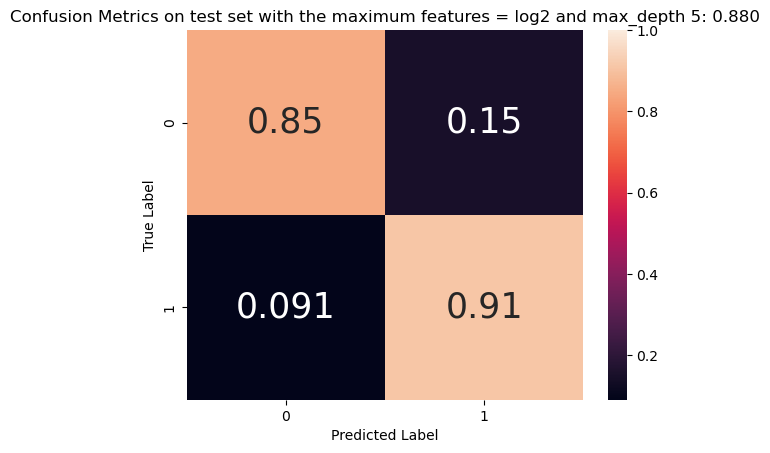

In [52]:
# Hyperparameter Tuning in Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt','log2']
max_depths = [None, 2,3,4,5]
for f,d in product(max_features, max_depths):
    rf = RandomForestClassifier(n_estimators = n_estimators, criterion = 'entropy', max_features = f,
                               max_depth = d, n_jobs=2, random_state = 101)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X = X_test)
    print('Classification Accuracy on test set with the maximum features = {} and max_depth {}: {:.3f}'.format(f,d, accuracy_score(y_test, prediction_test)))
    
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis = 1)[:, np.newaxis]
    
    plt.figure()
    plot_confusion_matrix(cm_norm, classes = rf.classes_, 
                          title='Confusion Metrics on test set with the maximum features = {} and max_depth {}: {:.3f}'.format(f,d, accuracy_score(y_test, prediction_test)))

## SVM 

In [ ]:
raw_data

In [ ]:
raw_data.columns

In [ ]:
feature_df = raw_data.drop('Revenue', axis = 1)
svm_X = np.asarray(feature_df)
svm_y = np.asarray(raw_data['Revenue'])


In [ ]:
# Perform Train Test Split


X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, train_size = 0.8, 
                                                    random_state = 102, stratify = y)

In [ ]:
# Create SVM model

classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C = 2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [ ]:
# CLassification Report

print(classification_report(y_test, y_predict))

In [ ]:
# Perform Hyperparameter Tuning

clf = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,20,30] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=2,verbose=0)
gsv.fit(X_train,y_train)

In [ ]:
gsv.best_estimator_

In [ ]:
# Build SVM model with the tuned parameter
clf = SVC(kernel='linear',C=10, gamma=0.1)
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

In [ ]:
# raw_data.to_csv('Rawdata.csv')